In [6]:
## Datasets comparison

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)


In [4]:
## Evaluate model based on the predictions with the test dataset

In [3]:
###Function to calculate and display performance metrics and roc_curve

# Function to calculate and display performance metrics
def calculate_metrics_and_display(predictions, true_labels, model_name):
    # Assuming 'probability' column represents predictions for class 1 (positive class)
    predictions_positive_class = predictions['probability']
    predictions_positive_class = np.nan_to_num(predictions_positive_class, nan=0.5)

    # Convert probabilities to binary predictions (use a threshold of 0.5 for simplicity)
    binary_predictions = (predictions_positive_class >= 0.5).astype(int)

    accuracy = accuracy_score(true_labels, binary_predictions)
    precision = precision_score(true_labels, binary_predictions)
    recall = recall_score(true_labels, binary_predictions)
    f1 = f1_score(true_labels, binary_predictions)

    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Precision: {precision:.4f}")
    print(f"{model_name} - Recall: {recall:.4f}")
    print(f"{model_name} - F1-score: {f1:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(true_labels, binary_predictions)
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    print("\nConfusion Matrix:")
    print(conf_matrix_df)

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(true_labels, predictions_positive_class)
    auc = roc_auc_score(true_labels, predictions_positive_class)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name}, AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()





In [4]:
# Load testing dataset
testing_data = pd.read_csv('../data/test_data/processed_test_dataset.csv')

# Extract features and true labels
testing_features = testing_data.drop(columns=['activity'])
true_labels = testing_data['activity']

Model eos4tcc - Accuracy: 0.8200
Model eos4tcc - Precision: 1.0000
Model eos4tcc - Recall: 0.6400
Model eos4tcc - F1-score: 0.7805

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           50            0
Actual 1           18           32


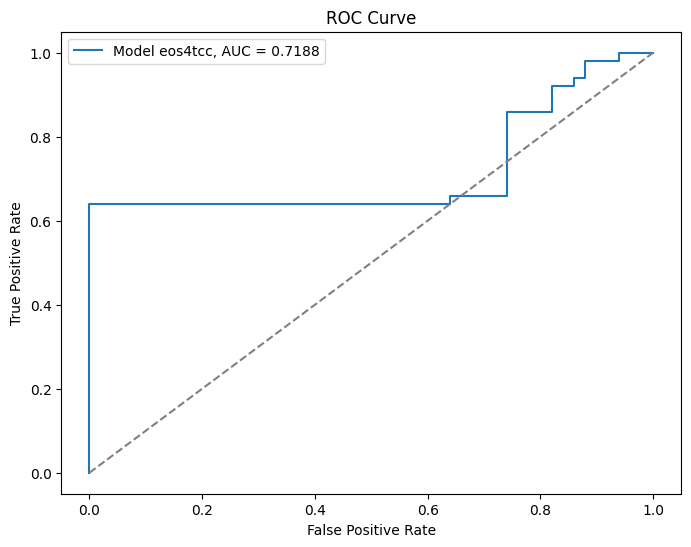

In [5]:
# Model eos4tcc
# Load predictions for Model eos4tcc 
predictions_eos4tcc = pd.read_csv('../data/predictions_data/prediction_eos4tcc.csv')

# Calculate and display metrics for Model eos4tcc
calculate_metrics_and_display(predictions_eos4tcc, true_labels, 'Model eos4tcc')

Model eos30f3 - Accuracy: 0.6900
Model eos30f3 - Precision: 0.6267
Model eos30f3 - Recall: 0.9400
Model eos30f3 - F1-score: 0.7520

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           22           28
Actual 1            3           47


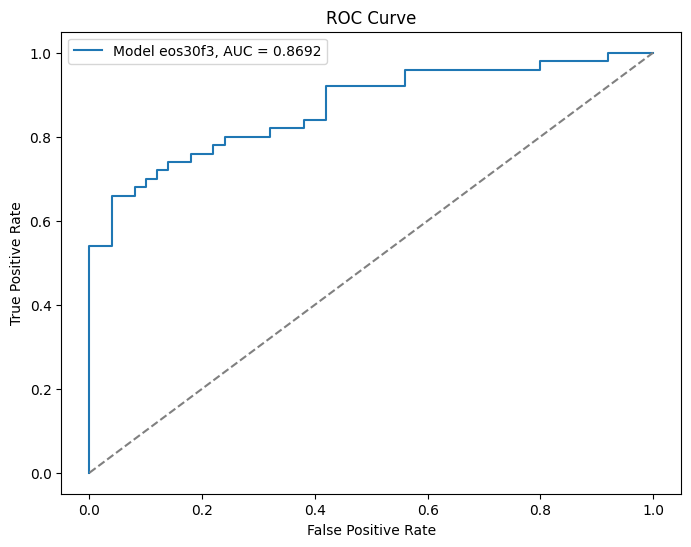

In [6]:
##Model eos30f3
# Load predictions for Model eos30f3
predictions_eos30f3 = pd.read_csv('../data/predictions_data/prediction_eos30f3.csv')

# Calculate and display metrics for Model eos30f3
calculate_metrics_and_display(predictions_eos30f3, true_labels, 'Model eos30f3')

Model eos30gr - Accuracy: 0.8300
Model eos30gr - Precision: 0.8511
Model eos30gr - Recall: 0.8000
Model eos30gr - F1-score: 0.8247

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           43            7
Actual 1           10           40


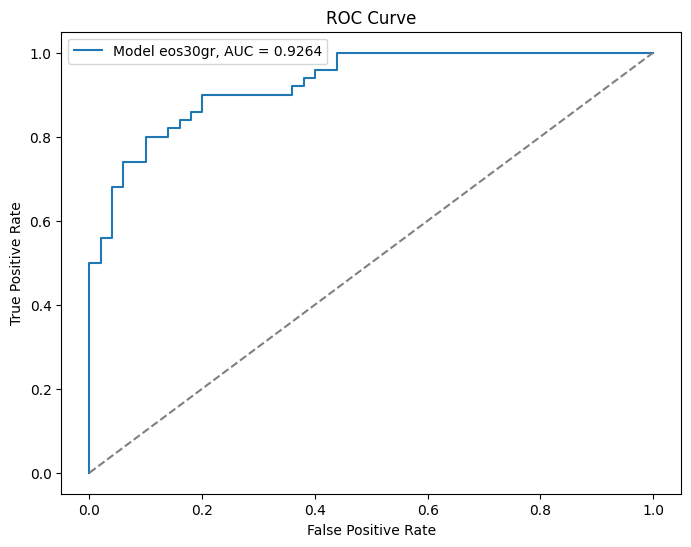

In [8]:
##eos30gr
# Load predictions for Model eos30gr
predictions_eos30gr = pd.read_csv('../data/predictions_data/prediction_eos30gr.csv')

# Calculate and display metrics for Model eos30gr
calculate_metrics_and_display(predictions_eos30gr, true_labels, 'Model eos30gr')

Model eos2ta5 - Accuracy: 0.8200
Model eos2ta5 - Precision: 0.8636
Model eos2ta5 - Recall: 0.7600
Model eos2ta5 - F1-score: 0.8085

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           44            6
Actual 1           12           38


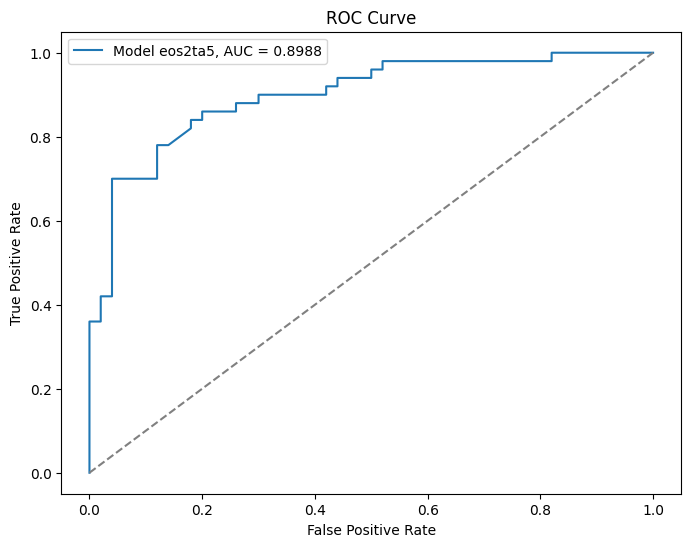

In [9]:
##Model eos2ta5

# Load predictions for Model eos2ta5
predictions_eos2ta5 = pd.read_csv('../data/predictions_data/prediction_eos2ta5.csv')

# Calculate and display metrics for Model eos2ta5
calculate_metrics_and_display(predictions_eos2ta5, true_labels, 'Model eos2ta5')


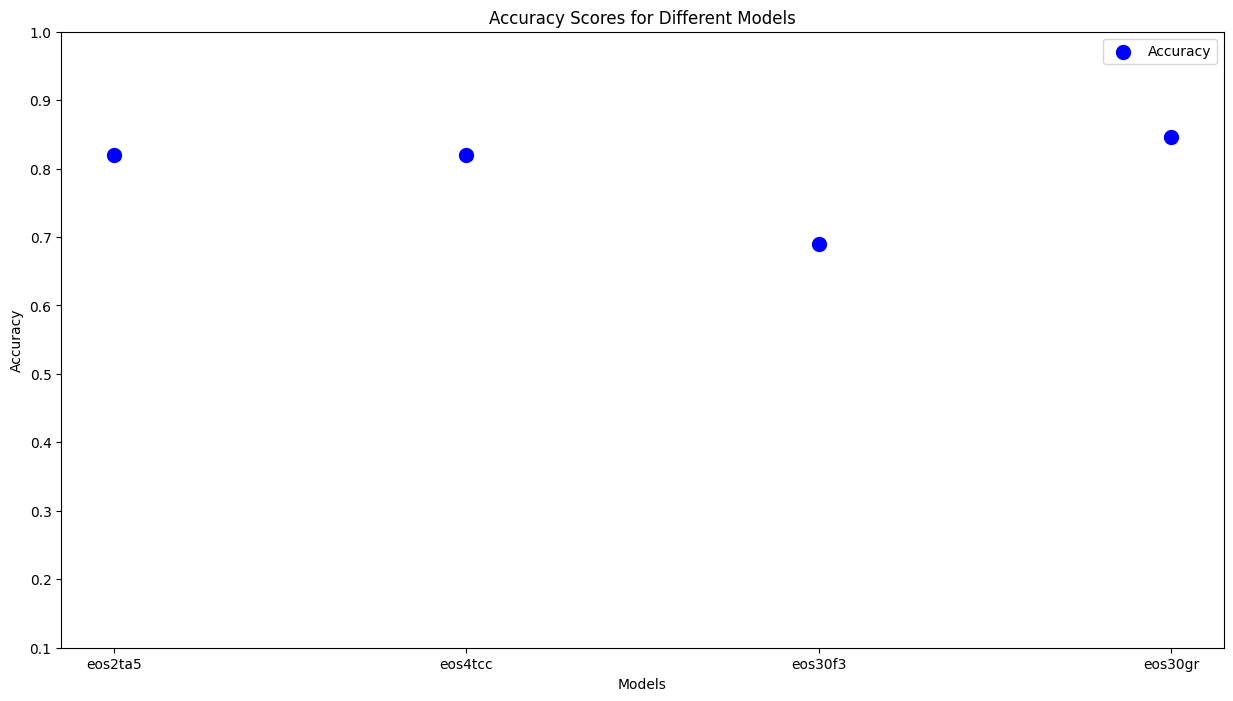

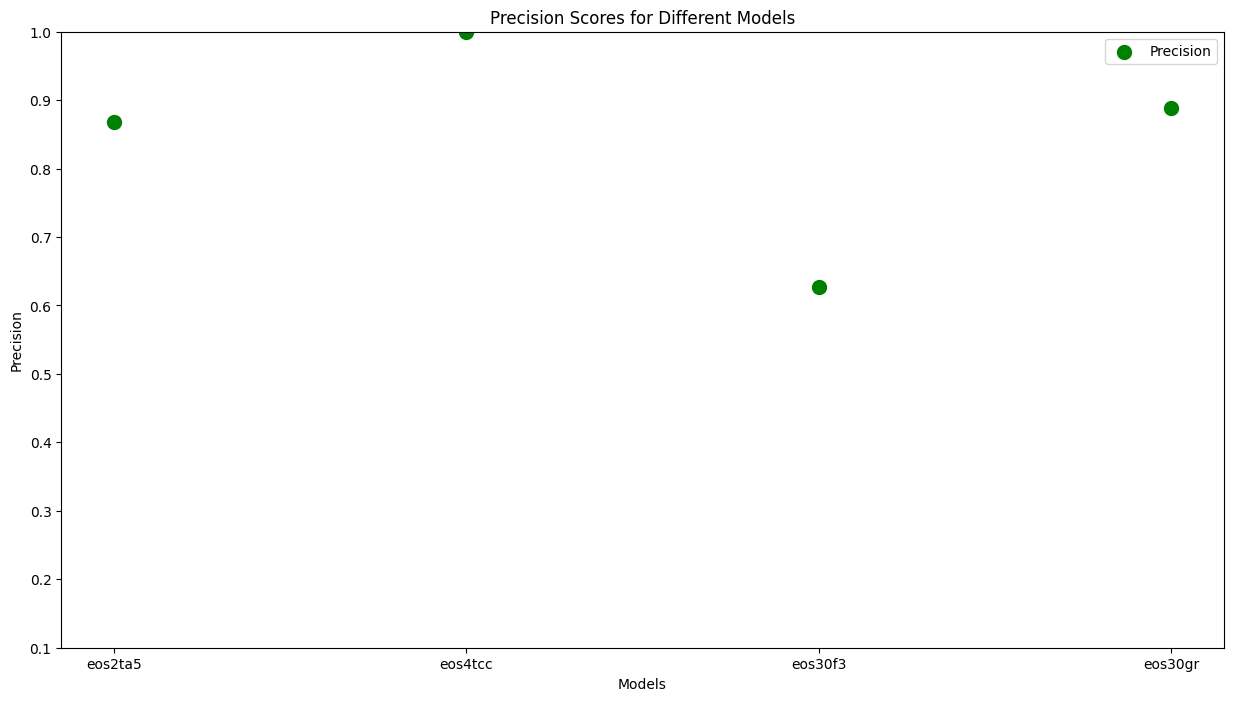

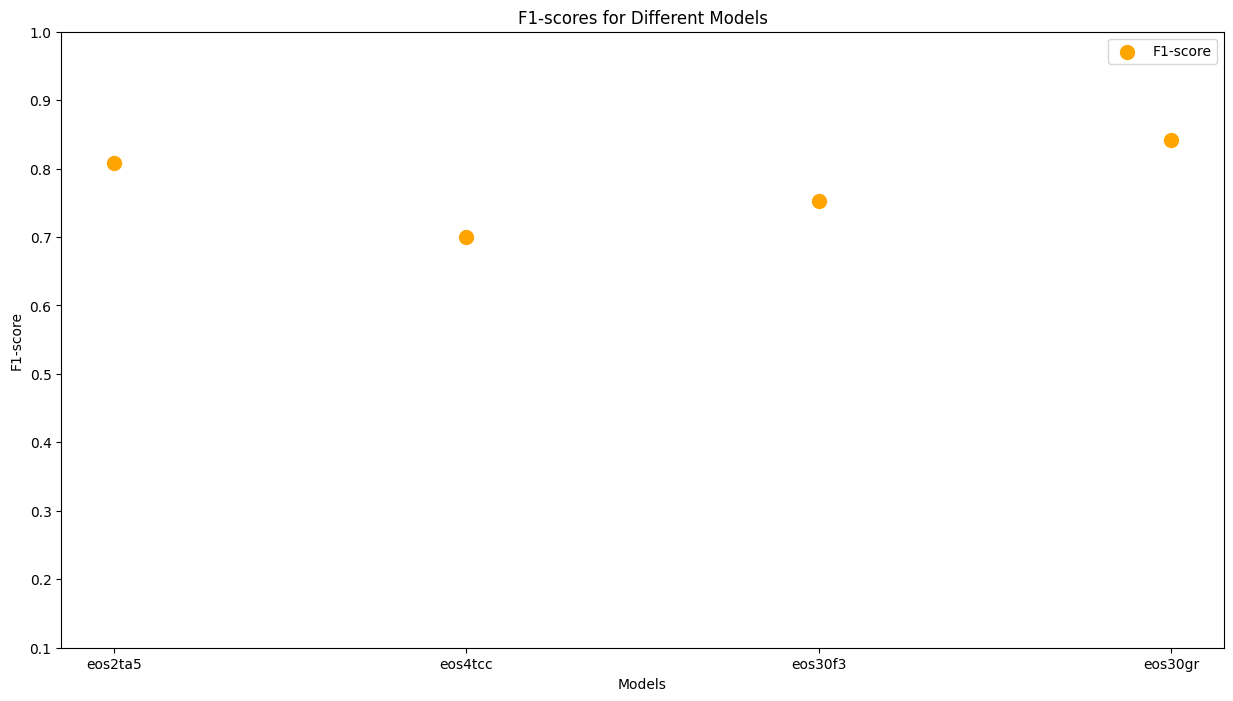

In [3]:
## Scatter plot to visualize the results from each model

# List of model names
import pandas as pd
import matplotlib.pyplot as plt

model_names = ['eos2ta5', 'eos4tcc', 'eos30f3', 'eos30gr']
import matplotlib.pyplot as plt

# List of model names
model_names = ['eos2ta5', 'eos4tcc', 'eos30f3', 'eos30gr']

# Lists with scores for each metric
accuracy_scores = [0.82, 0.82, 0.69, 0.8469]  
precision_scores = [0.8686, 1.0, 0.6267, 0.8889]  
f1_scores = [0.8085, 0.70, 0.7520, 0.8421]  

# Scatter plot for accuracy
plt.figure(figsize=(15, 8))
plt.scatter(model_names, accuracy_scores, label='Accuracy', s=100, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0.1, 1)
plt.legend()
plt.show()

# Scatter plot for precision
plt.figure(figsize=(15, 8))
plt.scatter(model_names, precision_scores, label='Precision', s=100, color='green')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Scores for Different Models')
plt.ylim(0.1, 1)
plt.legend()
plt.show()

# Scatter plot for F1-score
plt.figure(figsize=(15, 8))
plt.scatter(model_names, f1_scores, label='F1-score', s=100, color='orange')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-scores for Different Models')
plt.ylim(0.1, 1)
plt.legend()
plt.show()

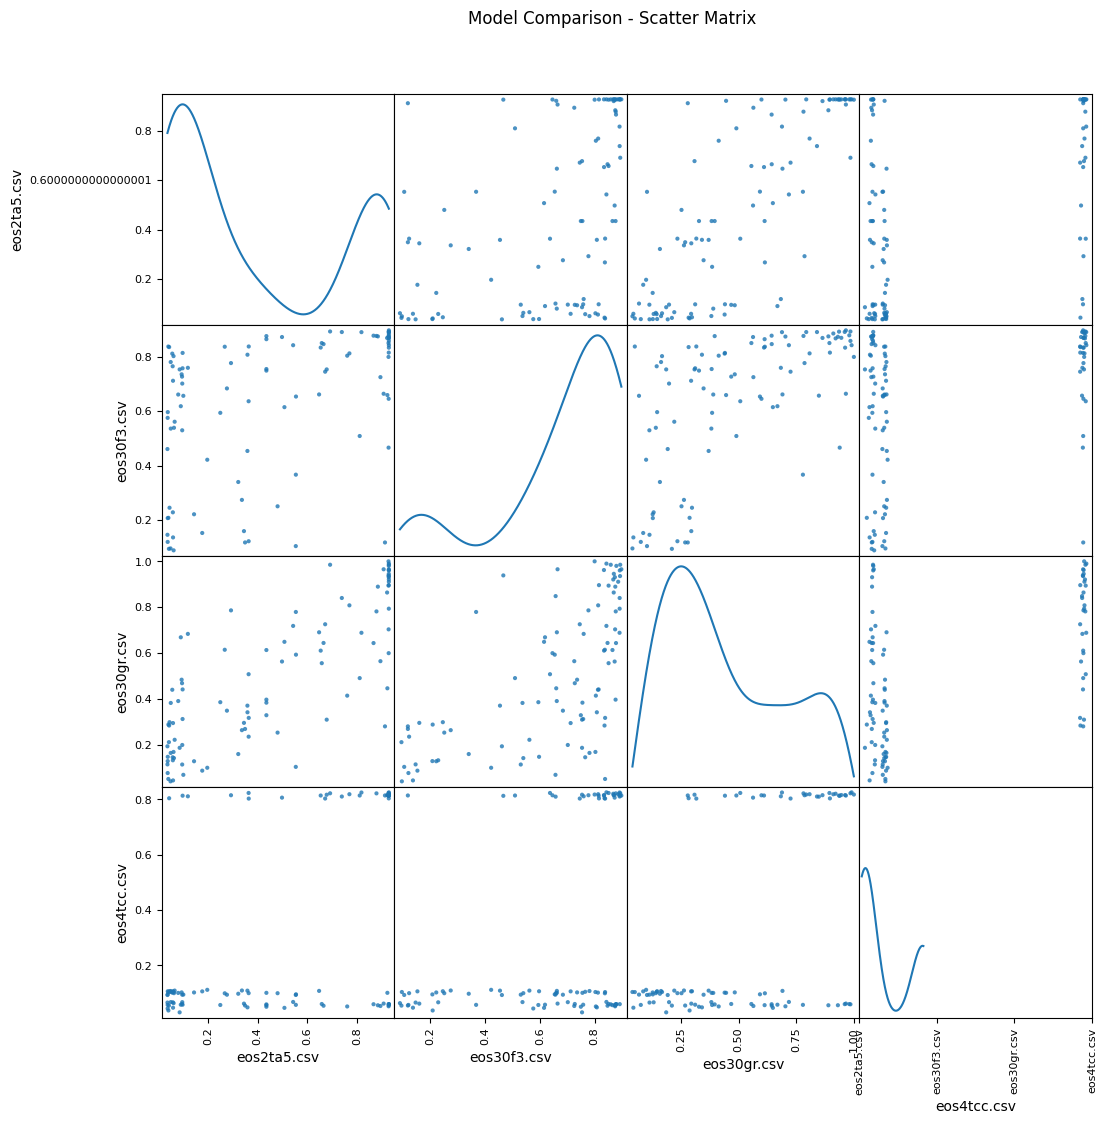

In [2]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# List of CSV file paths for each model
csv_files = ["../data/predictions_data/prediction_eos2ta5.csv", "../data/predictions_data/prediction_eos30f3.csv",
             "../data/predictions_data/prediction_eos30gr.csv", "../data/predictions_data/prediction_eos4tcc.csv"]

# Extract EOS model names from file paths
eos_model_names = [os.path.basename(file).split('_')[1] for file in csv_files]

# Create an empty list to store DataFrames for each model
dfs = []

# Load each CSV file into a DataFrame
for file_path in csv_files:
    df = pd.read_csv(file_path)
    dfs.append(df['probability'].values)  # Append numpy array of probabilities

# Create a single DataFrame with columns for each model
result_df = pd.DataFrame(dfs, index=eos_model_names).T

# Calculate correlation matrix
correlation_matrix = result_df.corr()

# Plotting scatter matrix with EOS model names
scatter_matrix(result_df, alpha=0.8, figsize=(12, 12), diagonal='kde')
plt.suptitle("Model Comparison - Scatter Matrix", y=0.95)

# Set ticks and labels for x and y axes
plt.xticks(range(len(eos_model_names)), eos_model_names, rotation='vertical')
plt.yticks(range(len(eos_model_names)), eos_model_names)

plt.show()


In [5]:
# Display correlation coefficients between each pair of models
# Extract EOS model names from file paths
eos_model_names = [os.path.basename(file).split('_')[1] for file in csv_files]

# Create an empty list to store DataFrames for each model
dfs = []

# Load each CSV file into a DataFrame
for file_path in csv_files:
    df = pd.read_csv(file_path)
    dfs.append(df['probability'])  # 'probability' is the column of interest

# Create a single DataFrame with columns for each model
result_df = pd.DataFrame(dict(zip(eos_model_names, dfs)))

# Calculate correlation matrix
correlation_matrix = result_df.corr()

# Display correlation coefficients between each pair of models
for i in range(len(eos_model_names)):
    for j in range(i + 1, len(eos_model_names)):
        model1 = eos_model_names[i]
        model2 = eos_model_names[j]
        correlation_coefficient = correlation_matrix.loc[model1, model2]
        print(f"Correlation Coefficient between {model1} and {model2}: {correlation_coefficient}")


Correlation Coefficient between eos2ta5.csv and eos30f3.csv: 0.4648800693135831
Correlation Coefficient between eos2ta5.csv and eos30gr.csv: 0.8083984264566326
Correlation Coefficient between eos2ta5.csv and eos4tcc.csv: 0.5061926547577261
Correlation Coefficient between eos30f3.csv and eos30gr.csv: 0.6293779139237584
Correlation Coefficient between eos30f3.csv and eos4tcc.csv: 0.37866813304993535
Correlation Coefficient between eos30gr.csv and eos4tcc.csv: 0.5304919981920366
